# Project: Investigating Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

## QUESTIONS:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

In [115]:
# import important libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# load data and inspect dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

<a id='wrangling'></a>
## Data Wrangling

1. **REMOVING UNIMPORTANT COLUMNS**

In [117]:
# drop features that are not useful to answer the two questions posed for this analysis.

df.drop(['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline',  'keywords', 'overview', 'production_companies', 'release_date'], axis = 1, inplace = True)
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [118]:
# dataframe information after features important for this analysis have been selected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   runtime       10866 non-null  int64  
 2   genres        10843 non-null  object 
 3   vote_count    10866 non-null  int64  
 4   vote_average  10866 non-null  float64
 5   release_year  10866 non-null  int64  
 6   budget_adj    10866 non-null  float64
 7   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 679.2+ KB


2. **CHECKING AND REMOVING NULL VALUES**

In [119]:
# check each feature for null values
df.isna().sum()

popularity       0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [120]:
# drop any entry with a null value in any of the feature
df.dropna(axis=0, how='any', inplace=True)

In [121]:
# confirm if all entries with null values have been removed from dataframe
df.isna().sum()

popularity      0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

3. **CHECKING AND REMOVING DUPLICATED VALUES**

In [122]:
# check for the presence and number of duplicate entries in dataframe
df.duplicated().sum()

1

In [123]:
# remove all duplicated entries in dataframe
df.drop_duplicates(inplace=True)

In [124]:
# final structure of cleaned dataframe ready for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10842 non-null  float64
 1   runtime       10842 non-null  int64  
 2   genres        10842 non-null  object 
 3   vote_count    10842 non-null  int64  
 4   vote_average  10842 non-null  float64
 5   release_year  10842 non-null  int64  
 6   budget_adj    10842 non-null  float64
 7   revenue_adj   10842 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 762.3+ KB


In [125]:
# number of unique values in each feature of the dataframe
df.nunique()

popularity      10791
runtime           246
genres           2039
vote_count       1289
vote_average       72
release_year       56
budget_adj       2613
revenue_adj      4840
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis between variables.


### Research Question 1 (Which genres are most popular from year to year?)

In [126]:
# spill genres entries into different geners
# this would enable us know the total number of unique genres in the dataframe

df_genres = df['genres'].str.split(pat = '|', n=-1, expand = True)
df_genres.nunique()

0    20
1    20
2    20
3    20
4    19
dtype: int64

From the results above, there are 20 unique genres in the dataframe

In [127]:
# make a sorted list of all the genres contained in the dataframe

genre_types = df_genres[0].unique().tolist()
genre_types.sort()
genre_types

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [128]:
# Construct a dataframe containing the different genres and their mean popularity rating for different years

dictionary = {}

for genre in genre_types:
    df_byGenres = df[df.genres.str.contains(genre, case=False)]
    
    df_popularityByYear = df_byGenres.groupby('release_year').popularity.mean()
    popularityByYear_dict = df_popularityByYear.to_dict()
    
    dictionary.update({genre:popularityByYear_dict})
    
df_genresByYear = pd.DataFrame(dictionary)
df_genresByYear

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1960,0.590724,0.700981,NaN,0.396000,0.346479,NaN,0.566305,0.278064,0.428247,0.194948,0.412364,0.591450,0.423531,NaN,0.541227,0.327905,NaN,0.811910,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,NaN,0.432233,0.755722,0.154073,0.113651,0.334463,0.254578,0.564748,0.712793,0.426036,0.274103,NaN,NaN,0.531184,0.210021
1962,0.708945,0.942513,NaN,0.273183,0.472816,NaN,0.392000,0.323463,0.235542,0.235542,0.600060,0.179368,0.323933,0.259220,0.365621,0.179212,NaN,0.760582,0.506162,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.552367,NaN,0.322448,0.852632,0.214071,0.351647,0.481618,0.376901,NaN,0.421033,0.399573,0.467835,NaN,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.261690,NaN,0.364818,0.878298,0.599791,0.152209,0.316377,0.189650,0.753799,0.308091,0.221586,0.226636,NaN,0.622580,0.930959,0.127679
1965,0.451373,0.581820,0.600975,0.358721,0.387277,NaN,0.305288,0.662713,NaN,0.004770,0.173948,0.124838,0.968850,0.209204,0.622780,0.101956,0.600975,0.343072,0.312124,0.191833
1966,0.263347,0.293593,0.585717,0.323658,0.340702,0.080598,0.339766,0.398896,0.424771,0.361556,0.335649,0.094397,NaN,0.234951,0.351903,0.317790,NaN,0.273869,0.290459,0.244657
1967,0.723570,1.025547,1.348805,0.434822,0.538359,0.095101,0.511467,0.962015,0.187009,NaN,NaN,0.289964,0.151540,0.401409,0.417445,0.187465,NaN,0.701979,0.485288,0.189740
1968,0.365562,1.109147,0.302135,0.329548,0.555919,NaN,0.377322,0.426263,0.445584,NaN,0.481894,0.558404,0.515485,1.519456,0.260356,1.343642,NaN,0.555919,0.316055,0.621202
1969,0.539976,0.748933,0.292274,0.270504,0.948020,NaN,0.489887,0.402277,0.204098,NaN,0.718985,0.141028,0.404251,0.567962,0.288267,0.172540,0.528660,0.871283,0.316193,0.509225


In [129]:
# identify the genre that is most popular for each year
df_genresByYear.idxmax(axis=1)

1960           Thriller
1961          Animation
1962          Adventure
1963          Animation
1964                War
1965              Music
1966          Animation
1967          Animation
1968            Mystery
1969              Crime
1970          Animation
1971             Family
1972              Crime
1973          Animation
1974            Mystery
1975          Adventure
1976              Crime
1977             Action
1978              Music
1979             Action
1980    Science Fiction
1981          Adventure
1982                War
1983          Adventure
1984             Family
1985             Family
1986          Adventure
1987            History
1988             Action
1989          Animation
1990          Adventure
1991          Animation
1992          Animation
1993            Fantasy
1994              Crime
1995          Animation
1996              Crime
1997    Science Fiction
1998                War
1999          Adventure
2000          Adventure
2001            

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [130]:
# display the structure of the dataframe
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


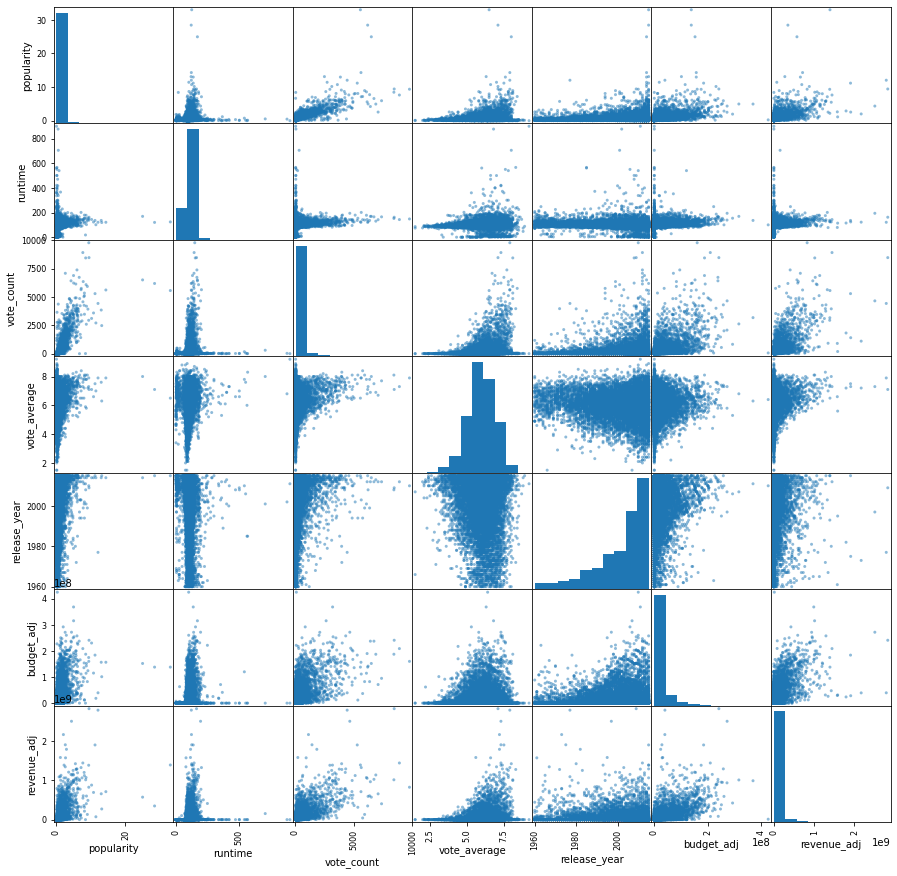

In [131]:
# quick visualization of each features and how they relate to each other
# Histograms show how the features are distributed across the range of their values. This shows if a feature is skewed or normal
# Scatterplots shows the relationship between two features in the dataframe. Tells if there is a relationship

pd.plotting.scatter_matrix(df, figsize = (15,15));

From the scatterplots above, we can see that vote_average and release_year has a positive relationship with the revenue_adj.

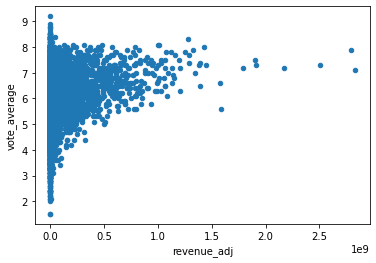

In [132]:
df.plot.scatter(x='revenue_adj', y='vote_average');

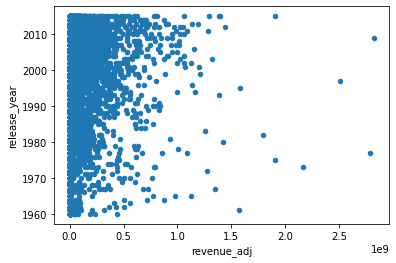

In [133]:
df.plot.scatter(x='revenue_adj', y='release_year');

<a id='conclusions'></a>
## Conclusions

1. From the analysis above, we can see that from the beginning of the 21st century, movies genres like Adventure, Fantasy and Western started gaining more popularity.
2. The revenue of a movie can be indicated from the average votes rating of the movie
3. More recent movies generate more revenues.

<a id='references'></a>
## References

1. https://www.stackoverflow.com
2. https://www.codegrepper.com/
3. https://datatofish.com/
4. https://www.geeksforgeeks.org/
5. https://www.w3schools.com/
6. Udacity datascience nanodegree materials
